## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns_all.csv  UNSW-NB15_2.csv
OTset.csv		SVR-predict-data.csv	  UNSW-NB15_3.csv
preprocessing.csv	testset.csv		  UNSW-NB15_4.csv


In [ ]:
attack_type = 'Analysis'

In [ ]:
import os
from os import path
my_path = '../Implementation Attacks/'+attack_type+'/plots'
if path.exists(my_path) == False:
  os.mkdir(my_path)

## **Load Unbalanced training datset for DOS attacks**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.utils import resample

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col[attack_type])


#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df[attack_type] == 1]
print(DoS_attacks.shape)
print(df[df['Label'] == 0].shape)
Normal_Data = df[df['Label'] == 0]
print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
# Attack = -1 , Normal = 1
result[attack_type] = [-1 if x==1 else 1 for x in result[attack_type]] 
X=result.drop(labels=attack_labels, axis=1)
Y=result[[attack_type]]
X.head()
x_train,y_train  = shuffle(X[columns],Y)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




(1592, 46)
(1331327, 46)
(100000, 46)


array([[6.62878818e-08, 1.85606069e-07, 7.95454582e-07, ...,
        2.45265163e-07, 2.45265163e-07, 1.19318187e-07],
       [2.84090909e-08, 7.95454545e-08, 3.40909091e-07, ...,
        2.84090909e-08, 2.84090909e-08, 2.84090909e-08],
       [6.28239509e-05, 4.18826339e-05, 1.98942511e-04, ...,
        8.72554874e-06, 6.98043899e-06, 1.74510975e-06],
       ...,
       [5.55194600e-05, 4.00973878e-05, 1.75811623e-04, ...,
        4.62662167e-06, 9.25324334e-06, 1.54220722e-06],
       [2.70327692e-03, 1.84961053e-03, 8.10983077e-03, ...,
        2.13416599e-04, 1.42277733e-04, 7.11388664e-05],
       [4.48763621e-04, 2.40799992e-04, 1.24778178e-03, ...,
        6.56727250e-05, 7.66181792e-05, 1.09454542e-05]])

In [ ]:
anomaly_rate = len(DoS_attacks)/len(result)

"Anomaly Rate is:"+"{:.1%}".format(anomaly_rate)

'Anomaly Rate is:1.6%'

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [ ]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns=list(select_col[attack_type])

test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 


for i in attack_categories:
  test_data[i] = test_data['attack_cat'].apply(lambda x: 1 if x == i else 0)

x_test=test_data[columns]
y_test= test_data[[attack_type,'Label']]

print(y_test)
x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
# print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in x_test:
    x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
if 'dsport' in x_test:
    x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in x_test:
    x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
if 'dstip' in x_test:
    x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
if 'proto' in x_test:
    x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
if 'state' in x_test:
    x_test['state'] = labelencoder.fit_transform(x_test['state'])

df = pd.concat([x_test, y_test], axis=1)

DoS_attacks = df[df[attack_type] == 1]
print(DoS_attacks.shape)
Normal_Data = df[df['Label'] == 0]
print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
print(result.shape)
# Attack = -1 , Normal = 1
result[attack_type] = [-1 if x==1 else 1 for x in result[attack_type]] 
X=result.drop(labels=[attack_type,'Label'], axis=1)
Y=result[[attack_type]]
X.head()
x_test,y_test  = shuffle(X[columns],Y)

X_test_DoS_normalized = preprocessing.normalize(x_test) 
X_test_DoS_normalized.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Analysis  Label
0              0      0
1              0      0
2              0      0
3              0      0
4              0      0
...          ...    ...
508005         0      0
508006         0      0
508007         0      0
508008         0      0
508009         0      0

[508010 rows x 2 columns]
(511, 17)
(443644, 17)
(444155, 17)


(444155, 15)

In [ ]:
anomaly_rate = len(DoS_attacks)/len(result)

"Anomaly Rate is:"+"{:.1%}".format(anomaly_rate)

'Anomaly Rate is:0.1%'

##**Isolation Forest**

In [ ]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime

%matplotlib inline



def byte_decoder(val):
    # decodes byte literals to strings
    
    return val.decode('utf-8')

def plot_confusion_matrix(cm, title, classes=['abnormal', 'normal'],
                          cmap=plt.cm.Blues, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(saveas, dpi=100)

def plot_gridsearch_cv(results, estimator, x_min, x_max, y_min, y_max,save=False, saveas="MyFigure.png"):
    
    # print GridSearch cross-validation for parameters
    
    plt.figure(figsize=(10,8))
    plt.title("GridSearchCV for "+estimator, fontsize=24)

    plt.xlabel(estimator)
    plt.ylabel("Score")
    plt.grid()

    ax = plt.axes()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    pad = 0.005
    X_axis = np.array(results["param_"+estimator].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ['b', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score+pad))

    plt.legend(loc="best")
    plt.grid('off')
    plt.tight_layout()
    if save:
        plt.savefig(saveas, dpi=100)
        
    plt.show()

In [ ]:
X_train_sa = x_train
X_test_sa = x_test
y_train_sa = y_train
y_test_sa = y_test

X_train_nd = X_train_DoS_normalized
X_test_nd = X_test_DoS_normalized
y_train_nd = y_train
y_test_nd = y_test

clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.15, n_estimators=100, n_jobs=-1)
clfLOF = LocalOutlierFactor(n_neighbors=15, metric='euclidean', algorithm='auto', contamination=0.15, n_jobs=-1)

clfIF.fit(X_train_sa.values,y_train_sa.values)
y_pred_train = clfIF.predict(X_train_sa.values)

y_pred_train_lof = clfLOF.fit_predict(X_train_nd, y_train_nd)

**Results on the SA training set:**

              precision    recall  f1-score   support

     anomaly       0.10      1.00      0.19      1592
      normal       1.00      0.86      0.93    100000

    accuracy                           0.87    101592
   macro avg       0.55      0.93      0.56    101592
weighted avg       0.99      0.87      0.92    101592

AUC:  93.2%


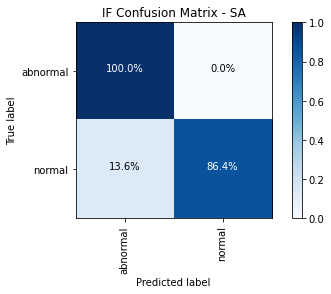

In [ ]:
print(classification_report(y_train_sa, y_pred_train, target_names=['anomaly', 'normal']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_train_sa, y_pred_train)))
cm = confusion_matrix(y_train_sa, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix - SA", save=True, saveas=my_path+"/IF_SA.png")

              precision    recall  f1-score   support

     anomaly       0.02      0.23      0.04      1592
      normal       0.99      0.85      0.91    100000

    accuracy                           0.84    101592
   macro avg       0.50      0.54      0.48    101592
weighted avg       0.97      0.84      0.90    101592

AUC:  54.1%


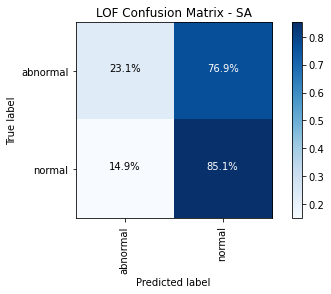

In [ ]:
print(classification_report(y_train_nd, y_pred_train_lof, target_names=['anomaly', 'normal']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_train_nd, y_pred_train_lof)))
cm = confusion_matrix(y_train_nd, y_pred_train_lof)
plot_confusion_matrix(cm, title="LOF Confusion Matrix - SA")

**Results on SA Test Sets**

              precision    recall  f1-score   support

     anomaly       0.01      1.00      0.01       511
      normal       1.00      0.83      0.91    443644

    accuracy                           0.83    444155
   macro avg       0.50      0.92      0.46    444155
weighted avg       1.00      0.83      0.91    444155

AUC:  91.7%


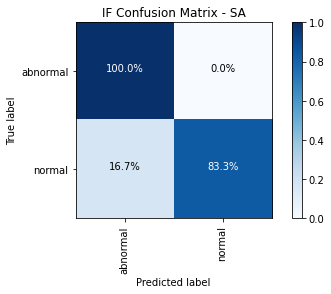

In [ ]:
y_pred_test = clfIF.predict(X_test_sa.values)

print(classification_report(y_test_sa, y_pred_test, target_names=['anomaly', 'normal']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test_sa, y_pred_test)))
cm = confusion_matrix(y_test_sa, y_pred_test)
plot_confusion_matrix(cm, title="IF Confusion Matrix - SA", save=True, saveas=my_path+"/IF_SA_Test.png")

**Setting Parameters of Isolation Forest - n_estimators**

In [ ]:
scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score, pos_label=-1)}

In [ ]:
gs = GridSearchCV(IsolationForest(max_samples=0.25, random_state=11, contamination = 0.15, n_jobs=-1),
                  param_grid={'n_estimators': range(20, 230, 30)},
                  scoring=scoring, refit='Recall', return_train_score=True)
gs.fit(X_train_sa.values, y_train_sa.values)
results = gs.cv_results_

<ipython-input-9-35492451f29b>:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


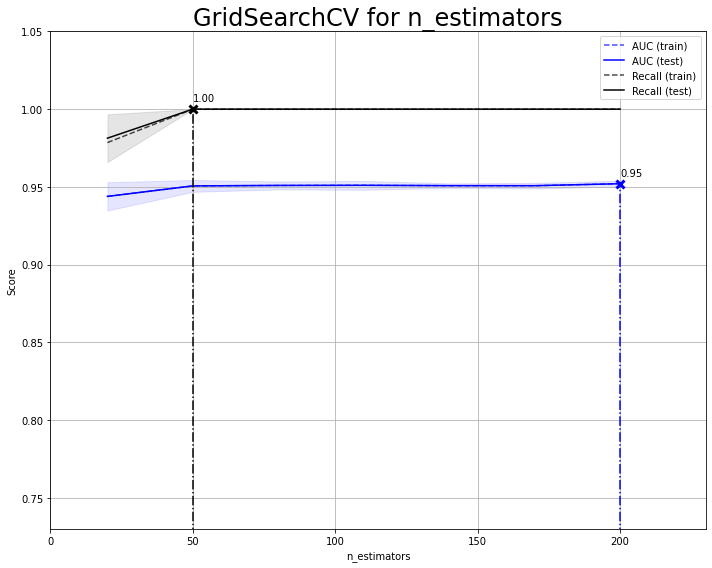

In [ ]:
plot_gridsearch_cv(results, "n_estimators", 0, 230, 0.73, 1.05, save=True, saveas=my_path+"/GS_n_est.png")

**Setting Parameters of Isolation Forest - max_samples**

In [ ]:
gs_ms = GridSearchCV(IsolationForest(random_state=11, contamination = 0.15, n_estimators=50, n_jobs=-1),
                  param_grid={'max_samples': np.arange(0.1, 1.0, 0.1)},
                  scoring=scoring, refit='Recall', return_train_score=True)
gs_ms.fit(X_train_sa.values, y_train_sa.values)
results = gs_ms.cv_results_

<ipython-input-9-35492451f29b>:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


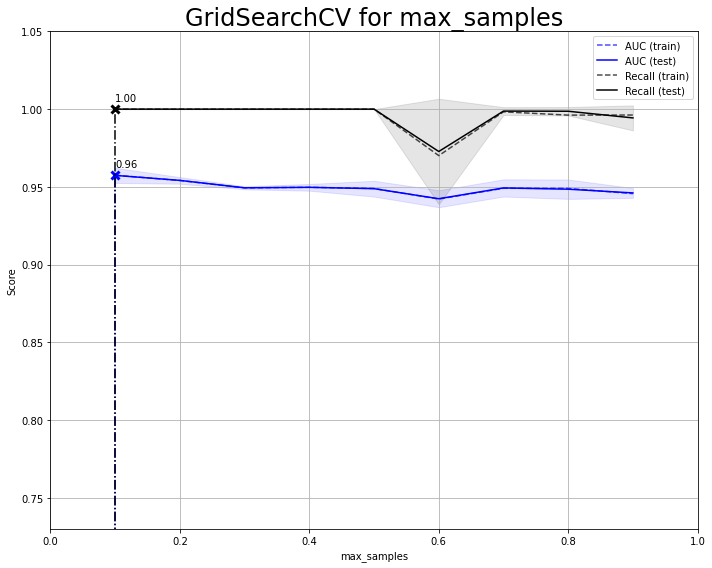

In [ ]:
plot_gridsearch_cv(results, "max_samples", 0, 1, 0.73, 1.05, save=True, saveas=my_path+"/GS_max_samples.png")

**Setting Parameters of Isolation Forest - contamination**

In [ ]:
gs_cont = GridSearchCV(IsolationForest(random_state=11, max_samples=0.10, n_estimators=50, n_jobs=-1),
                  param_grid={'contamination': np.arange(0.01, 0.25, 0.05)},
                  scoring=scoring, refit='Recall', return_train_score=True)
gs_cont.fit(X_train_sa.values, y_train_sa.values)
results = gs_cont.cv_results_

<ipython-input-9-35492451f29b>:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


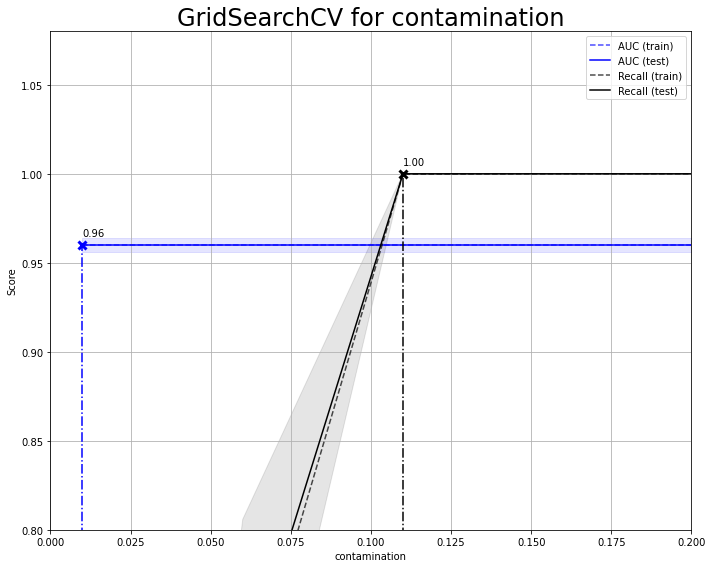

In [ ]:
plot_gridsearch_cv(results, "contamination", 0, 0.20, 0.80, 1.08, save=True, saveas=my_path+"/GS_cont.png")

**Setting Parameters of Isolation Forest - bootstrap & max_features**

In [ ]:
# # Number of features to consider at every split
# max_features = np.arange(0.1,3.1,0.1)
# # Maximum number of levels in tree
# bootstrap = [True, False]
# # Create the param grid
# param_grid = { 'max_features': max_features,
#                'bootstrap': bootstrap}

#  # create regressor object
# gs_others = GridSearchCV(IsolationForest(max_samples=0.10, random_state=11, contamination = 0.16, n_estimators=50, n_jobs=-1),param_grid,scoring=scoring, refit='Recall', return_train_score=True)

# gs_others.fit(X_train_sa.values, y_train_sa.values)
# results = gs_others.cv_results_

In [ ]:
# print(gs_others.best_params_)

              precision    recall  f1-score   support

     anomaly       0.01      1.00      0.01       511
      normal       1.00      0.84      0.91    443644

    accuracy                           0.84    444155
   macro avg       0.50      0.92      0.46    444155
weighted avg       1.00      0.84      0.91    444155

AUC:  92.1%


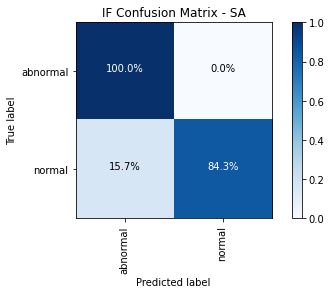

In [ ]:
clfIF = IsolationForest(max_samples=0.10, random_state=11, contamination = 0.16, n_estimators=50, n_jobs=-1)

clfIF.fit(X_train_sa.values,y_train_sa.values)
y_pred_test = clfIF.predict(X_test_sa.values)

print(classification_report(y_test_sa, y_pred_test, target_names=['anomaly', 'normal']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test_sa, y_pred_test)))
cm = confusion_matrix(y_test_sa, y_pred_test)
plot_confusion_matrix(cm, title="IF Confusion Matrix - SA", save=True, saveas=my_path+"/optimized_IF_SA_Test.png")